In [41]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [46]:
import tweepy
import pandas as pd


#Set up credentials
# AAAAAAAAAAAAAAAAAAAAAEmiwgEAAAAA8m2fN5gxQDQ%2BJklGCemAmpSfhBc%3DFskpIa6Ab8dyNnSGpH0P98GY5E8NR4Niuog9mLaKPWgrnBn4jL
consumer_key = 'ymZ0UOPgsR1cQOLeF3182UO47'
consumer_secret = '8tJu0S979aSDdqEWp9brIfeN6KX9h6KqubB6HEcw3mTD82tnDn'
access_token = '1850903838628184064-ixD2sMqT30h9Cu4qSAJPJmFwe0iI7I'
access_token_secret = 'vSGaaYJcl6moQlzu2YFubrgdNQlQXLgex4BfMmC83ksEZ'

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth)

# Test the connection by getting your account's information
try:
    user = api.verify_credentials()  # Use this instead of api.me()
    print(f'Authenticated as: {user.screen_name}')  # Use screen_name to print the username
except tweepy.TweepyException as e:  # Updated error class
    print(f'Error: {e}')

Authenticated as: cherrisneha


In [47]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd  # Don't forget to import pandas

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove punctuation and special characters
    text = text.lower()  # Convert to lowercase
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    return ' '.join(tokens)

# Sample DataFrame
data = {
    'Tweet': [
        'Check out this link: http://example.com',
        'NLTK is a great library for natural language processing!',
        'I love programming in Python! #coding',
        'What a beautiful day!!!'
    ]
}

df = pd.DataFrame(data)  # Create a DataFrame

# Apply cleaning
df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)

# Display the DataFrame with cleaned tweets
print(df[['Tweet', 'Cleaned_Tweet']])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/snehacherukuri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/snehacherukuri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               Tweet  \
0            Check out this link: http://example.com   
1  NLTK is a great library for natural language p...   
2              I love programming in Python! #coding   
3                            What a beautiful day!!!   

                                    Cleaned_Tweet  
0                                      check link  
1  nltk great library natural language processing  
2                  love programming python coding  
3                                   beautiful day  


In [48]:
from textblob import TextBlob

# Define sentiment function
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
df['Sentiment'] = df['Cleaned_Tweet'].apply(get_sentiment)

In [49]:
# Optional: Use VADER for improved accuracy on social media text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['VADER_Sentiment'] = df['Cleaned_Tweet'].apply(vader_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/snehacherukuri/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


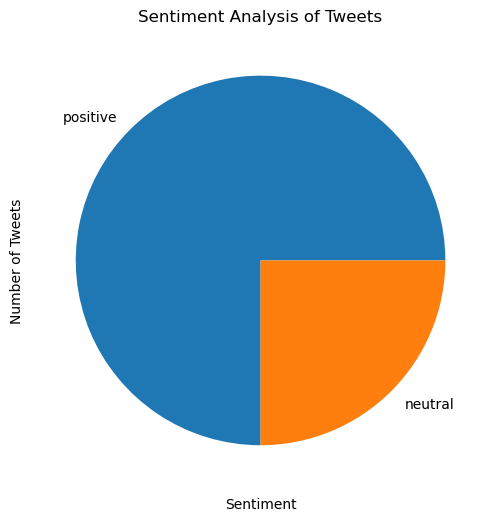

In [50]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', color=['green', 'gray', 'red'])
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [51]:
import tweepy
print(tweepy.__version__)

4.14.0


In [52]:
pip install --upgrade tweepy

Note: you may need to restart the kernel to use updated packages.


Authentication OK


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/snehacherukuri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


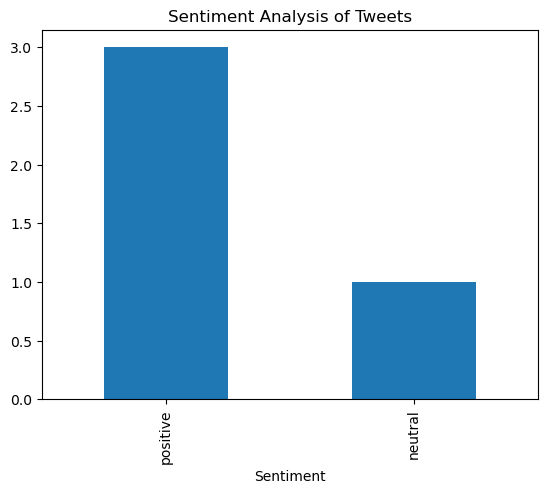

In [61]:
import tweepy
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt

# Initialize Tweepy API (use your credentials here)
consumer_key = 'ymZ0UOPgsR1cQOLeF3182UO47'
consumer_secret = '8tJu0S979aSDdqEWp9brIfeN6KX9h6KqubB6HEcw3mTD82tnDn'
access_token = '1850903838628184064-ixD2sMqT30h9Cu4qSAJPJmFwe0iI7I'
access_token_secret = 'vSGaaYJcl6moQlzu2YFubrgdNQlQXLgex4BfMmC83ksEZ'

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth)

# Check authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except Exception as e:
    print("Error during authentication", e)
'''

# Collect tweets using v2 API (Ensure your app has access to v2)
query = 'BrandName -is:retweet'
tweets = api.search_recent_tweets(query=query, max_results=100, tweet_fields=['text'])

# Process collected tweets
data = [[tweet.text] for tweet in tweets.data]  # Access the 'data' attribute for v2
df = pd.DataFrame(data, columns=["Tweet"])

'''
# Preprocess function
def clean_text(text):
    text = re.sub(r'http\S+', '', text).lower()  # Remove URLs and convert to lower case
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove punctuation
    return ' '.join([word for word in text.split() if word not in stopwords.words('english')])

# Download stopwords if not already downloaded
nltk.download('stopwords')
# Preprocess tweets
df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)

# Sentiment Analysis
df['Sentiment'] = df['Cleaned_Tweet'].apply(lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0 else 'neutral' if TextBlob(x).sentiment.polarity == 0 else 'negative')

# Visualize sentiment
df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Analysis of Tweets')
plt.show()

In [ ]:
pip install openpyxl xlsxwriter

In [63]:
import tweepy
import pandas as pd

# Initialize the client with Bearer Token
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAEmiwgEAAAAA5G%2BY3w5AQz41mvk%2F7q0IUbx%2B5Ro%3Drgsl0MvMUU7cFuUScbL9YkqZC5fXnk4Gp8WuQmSvLb9gwu57uH'  # Replace with your actual Bearer Token
client = tweepy.Client(bearer_token=bearer_token)
'''
# Collect tweets (make sure to adjust the query and fields as needed)
query = 'BrandName -is:retweet'
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['text'])

# Process collected tweets
data = [[tweet.text] for tweet in tweets.data]
df = pd.DataFrame(data, columns=["Tweet"])
'''
# Save DataFrame to CSV
csv_file_path = 'tweets_data.csv'
df.to_csv(csv_file_path, index=False)

# Alternatively, save DataFrame to JSON
json_file_path = 'tweets_data.json'
df.to_json(json_file_path, orient='records', lines=True)

print(f"Data saved to {csv_file_path} and {json_file_path}")

Data saved to tweets_data.csv and tweets_data.json
